In [3]:
# While in argo environment: Import necessary packages for this notebook 
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline 
import glob

!python -m pip install "dask[complete]" 

In [4]:
float_id = '9094' # '9094'/5904471 '9099' '7652' '9125'
f_id21='5904471'
rootdirLR = '../data/raw/LowRes/'
rootdir21 = '../data/raw/SOCCOM_HiResQC_LIAR_21Dec2021_netcdf/'
rootdir = '../data/raw/'
fd = xr.open_mfdataset(rootdir + float_id + '*.nc') #SOOCNQC
fd21=xr.open_mfdataset(rootdir21 + f_id21 + '*.nc') #SOOCNQC
fdLR = xr.open_mfdataset(rootdirLR + float_id + '*.nc') #SOOCNQC

highres='True'
JULD = pd.to_datetime(fd.JULD.values)
JULD21 = pd.to_datetime(fd21.JULD.values)


#reads float data
file_folder = "../data/raw/WGfloats/"
#file_folder = "../../data/raw/LowRes"
float_number = "5904468" #7900918 #9094

files = sorted(glob.glob(file_folder+"/*"+float_number+"*.nc"))
print(files)
#files = sorted(glob.glob(file_folder+"/*.nc"))

fd = xr.open_mfdataset(file_folder+"/*"+float_number+"*.nc")
JULD = pd.to_datetime(fd.JULD.values)

In [5]:
fd

<xarray.Dataset>
Dimensions:              (N_PROF: 159, N_LEVELS: 558, NPARAMETER: 46)
Dimensions without coordinates: N_PROF, N_LEVELS, NPARAMETER
Data variables: (12/66)
    Cruise               |S11 ...
    Station              (N_PROF) int32 dask.array<chunksize=(159,), meta=np.ndarray>
    Lon                  (N_PROF) float64 dask.array<chunksize=(159,), meta=np.ndarray>
    Lat                  (N_PROF) float64 dask.array<chunksize=(159,), meta=np.ndarray>
    Lat_QF               (N_PROF) |S1 dask.array<chunksize=(159,), meta=np.ndarray>
    Lat_QFA              (N_PROF) float64 dask.array<chunksize=(159,), meta=np.ndarray>
    ...                   ...
    Type                 |S1 ...
    mon_day_yr           (N_PROF) |S10 dask.array<chunksize=(159,), meta=np.ndarray>
    hh_mm                (N_PROF) |S5 dask.array<chunksize=(159,), meta=np.ndarray>
    Parameters           (NPARAMETER) |S19 dask.array<chunksize=(46,), meta=np.ndarray>
    JULD                 (N_PROF) datetime64[ns] dask.array<chunksize=(159,), meta=np.ndarray>
    REFERENCE_DATE_TIME  object ...
Attributes:
    Comments:  \n//0\n//<Encoding>UTF-8</Encoding>\n//File updated on 01/15/2...

In [34]:
print(fdLR)

<xarray.Dataset>
Dimensions:              (N_PROF: 159, N_LEVELS: 68, NPARAMETER: 46)
Dimensions without coordinates: N_PROF, N_LEVELS, NPARAMETER
Data variables: (12/66)
    Cruise               |S11 ...
    Station              (N_PROF) int32 dask.array<open_dataset-82c6808f0d14d...
    Lon                  (N_PROF) float64 dask.array<open_dataset-82c6808f0d1...
    Lat                  (N_PROF) float64 dask.array<open_dataset-82c6808f0d1...
    Lat_QF               (N_PROF) |S1 dask.array<open_dataset-82c6808f0d14d67...
    Lat_QFA              (N_PROF) float64 dask.array<open_dataset-82c6808f0d1...
    ...                   ...
    Type                 |S1 ...
    mon_day_yr           (N_PROF) |S10 dask.array<open_dataset-82c6808f0d14d6...
    hh_mm                (N_PROF) |S5 dask.array<open_dataset-82c6808f0d14d67...
    Parameters           (NPARAMETER) |S19 dask.array<open_dataset-82c6808f0d...
    JULD                 (N_PROF) datetime64[ns] dask.array<open_dataset-82c6...
   

In [35]:
print(fd21)

<xarray.Dataset>
Dimensions:              (N_PROF: 159, N_LEVELS: 558, NPARAMETER: 46)
Dimensions without coordinates: N_PROF, N_LEVELS, NPARAMETER
Data variables: (12/66)
    Cruise               |S11 ...
    Station              (N_PROF) int32 dask.array<open_dataset-22f8a631dce4a...
    Lon                  (N_PROF) float64 dask.array<open_dataset-22f8a631dce...
    Lat                  (N_PROF) float64 dask.array<open_dataset-22f8a631dce...
    Lat_QF               (N_PROF) |S1 dask.array<open_dataset-22f8a631dce4a3a...
    Lat_QFA              (N_PROF) float64 dask.array<open_dataset-22f8a631dce...
    ...                   ...
    Type                 |S1 ...
    mon_day_yr           (N_PROF) |S10 dask.array<open_dataset-22f8a631dce4a3...
    hh_mm                (N_PROF) |S5 dask.array<open_dataset-22f8a631dce4a3a...
    Parameters           (NPARAMETER) |S19 dask.array<open_dataset-22f8a631dc...
    JULD                 (N_PROF) datetime64[ns] dask.array<open_dataset-22f8...
  

#help(xr.open_mfdataset)

rootdir + float_id + 'SOOCNQC.nc'

#Data/LowRes/9099SOOCNQC.nc
#fd

In [6]:
# HELPER FUNCTIONS

#define a function that smooths using a boxcar filter (running mean)
    # not sure this function is actually used in the notebook??
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

#interpolate the data onto the standard depth grid given by x_int
def interpolate(x_int, xvals, yvals):
    yvals_int = []
    for n in range(0, len(yvals)): # len(yvals) = profile number
        yvals_int.append(np.interp(x_int, xvals[n, :], yvals[n, :]))
    #convert the interpolated data from a list to numpy array
    return np.asarray(yvals_int)

# calculate the vertically integrated data column inventory using the composite trapezoidal rule
def integrate(zi, data, depth_range):
    n_profs = len(data)
    zi_start = abs(zi - depth_range[0]).argmin() # find location of start depth
    zi_end =  abs(zi - depth_range[1]).argmin() # find location of end depth
    zi_struct = np.ones((n_profs, 1)) * zi[zi_start : zi_end] # add +1 to get the 200m value
    data = data[:, zi_start : zi_end] # add +1 to get the 200m value
    col_inv = []
    for n in range(0, len(data)):
        col_inv.append(np.trapz(data[n,:][~np.isnan(data[n,:])], zi_struct[n,:][~np.isnan(data[n,:])]))
    return col_inv

In [180]:
# HELPER FUNCTIONS
# edited by Clara 05/03/2022

#interpolate the data onto the standard depth grid given by x_int
def interpolate(x_int, xvals, yvals):
    yvals_int = []
    for n in range(0, len(yvals)): # len(yvals) = profile number
        if highres:
            yvalmasked=np.ma.array(yvals[n,:])
            yvalmasked.mask=np.isfinite(yvalmasked)
            yvalsclean=yvals[n,:][yvalmasked.mask]
            xvalsclean=xvals[n,:][yvalmasked.mask]
            yvals_int.append(np.interp(x_int, xvalsclean, yvalsclean))
        else:
            yvals_int.append(np.interp(x_int, xvals[n, :], yvals[n, :]))
    #convert the interpolated data from a list to numpy array
    return np.asarray(yvals_int)

# calculate the vertically integrated data column inventory using the composite trapezoidal rule
def integrate(zi, data, depth_range):
    n_profs = len(data)
    zi_start = abs(zi - depth_range[0]).argmin() # find location of start depth
    zi_end =  abs(zi - depth_range[1]).argmin() # find location of end depth
    zi_struct = np.ones((n_profs, 1)) * zi[zi_start : zi_end] # add +1 to get the 200m value
    data = data[:, zi_start : zi_end] # add +1 to get the 200m value
    col_inv = []
    for n in range(0, len(data)):
        col_inv.append(np.trapz(data[n,:][~np.isnan(data[n,:])], zi_struct[n,:][~np.isnan(data[n,:])]))
    return col_inv

In [162]:
#fd #(float data)
#fd.Pressure.isel(N_PROF=0).values
yvals=fd.Nitrate[:, ::-1]
len(yvals)
print(np.array(fd.Nitrate[0, ::-1])) # shallowest first

[  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan 32.51   nan
   nan   nan 32.48   nan   nan   nan 32.67   nan   nan 32.66   nan   nan
   nan 32.78   nan   nan   nan 32.9    nan   nan   nan 33.45   nan   nan
 33.29   nan   nan 33.4    nan   nan   nan 33.1    nan   nan   nan 33.18
   nan   nan   nan   nan 34.5    nan   nan   nan 35.5    nan   nan   nan
   nan 35.39   nan   nan   nan   nan 35.44   nan   nan   nan   nan 35.36
   nan   nan   nan   nan   nan 35.4    nan   nan   nan   nan   nan 35.31
   nan   nan   nan   nan   nan 35.14   nan   nan   nan   nan 35.     nan
   nan   nan   nan   nan 34.96   nan   nan   nan   nan   nan   nan 34.88
   nan   nan   nan   nan   nan 34.91   nan   nan   nan   nan   nan 34.93
   nan   nan   nan   nan   nan 34.85   nan   nan   nan   nan   nan 34.73
   nan   nan   nan   nan   nan 34.8    nan   nan   nan   nan   nan 34.81
   nan   nan   nan   nan   nan 34.77   nan   nan   nan   nan   nan 34.77
   nan   nan   nan   nan   nan 34.44   nan   nan   

In [20]:
# Interpolate nitrate and poc
zi = np.arange(0, 1600, 5) # 5 = 320 depth intervals between 0m to 1595m
nitr_int = interpolate(zi, fd.Pressure[:, ::-1], fd.Nitrate[:, ::-1]) # interpolate nitrate values across zi depth intervals for all 188 profiles # ::-1 sets stride to -1 intervals

# Integrate nitrate and poc - total nitrate in upper 200m
upperlim=25
lowerlim=200
nitr = np.array(integrate(zi, nitr_int, [upperlim, lowerlim])) # integrate interpolated nitrate values between 25m-200m 

In [21]:
print(nitr)
#nitr.shape

[5884.64622024 5721.65531726 5602.44399794 5520.27985333 5455.41719828
 5391.9213858  5479.44401897 5508.25543581 5592.36579726 5589.91995657
 5557.15823478 5559.35747554 5553.88891863 5575.22391296 5561.47180647
 5528.53021754 5534.32938019 5497.93982039 5488.17178344 5549.90723605
 5464.00293491 5404.94977774 5527.54824269 5416.21150375 5529.66591214
 5558.91960685 5474.42990105 5537.65119602 5534.67307126 5569.2220892
 5516.7619716  5511.37846565 5513.71016107 5501.12454389 5467.60101741
 5465.33025542 5436.56417746 5370.07432146 5238.53917671 5302.87225069
 5239.2864977  5250.21991778 5265.71230901 5345.67360823 5319.75429365
 5326.98531255 5318.43915998 5293.05723929 5195.24048007 5226.44801753
 5289.00537447 5327.1222224  5379.64755525 5327.30269362 5305.07060682
 5415.50493909 5390.57434367 5391.58920871 5402.12147937 5496.90248844
 5419.26668804 5495.08139418 5499.54392718 5494.04501234 5520.36893652
 5522.46969949 5486.51579861 5499.69411884 5496.50225029 5490.56445157
 5450.5

In [22]:
# Find winter maximum and summer minimum upper ocean nitrate levels 
def find_extrema(data, date_range, find_func):
    # Find indices of float profiles in the date range
    date_mask = (JULD > date_range[0]) & (JULD < date_range[1])
    
    # Get the index where the data is closest to the find_func
    index = np.where(data[date_mask] == find_func(data[date_mask]))[0][0]
    
    # Get the average data for the month of the extrema
    month_start = JULD[date_mask][index].replace(day = 1) # .replace just changes the day of max/min to 1
    month_dates = (JULD > month_start) & (JULD < month_start + pd.Timedelta(days = 30)) 
            # ^ not sure why this is needed? or what it does? - it is not used later on...
    #month_avg = np.mean(data[date_mask]) #average whole winter or summer values
            # ^ but it should be just the month of max/min nitrate, 
            # not the average for the whole season?... 
    
    month_mask = (JULD.month[date_mask] == month_start.month)
    month_avg = np.mean(data[date_mask][month_mask])
    
    return month_avg, JULD[date_mask][index], data[date_mask][index]

years = [2015, 2016, 2017, 2018]
nitr_extrema = []
nitr_ancp = []
for y in years:
    winter_range = [pd.datetime(y, 8, 1), pd.datetime(y, 12, 1)] #4 months
    summer_range = [pd.datetime(y, 12, 1), pd.datetime(y + 1, 4, 1)] #4 months

    # Find maximum winter and minimum summer nitrate
    avg_max_nitr, max_nitr_date, max_nitr = find_extrema(nitr, winter_range, np.max)
    avg_min_nitr, min_nitr_date, min_nitr = find_extrema(nitr, summer_range, np.min)
    
    
    # Convert to annual nitrate drawdown
    redfield_ratio = 106.0/16.0 #106C:16NO3-
    
    # Nitrate units: umol/kg --> divide by 1000 to convert to mol/kg
    
    nitr_drawdown = (avg_max_nitr - avg_min_nitr)/1000.0 * redfield_ratio
    
    nitr_ancp.append(nitr_drawdown)
    
    nitr_extrema.append(((max_nitr, max_nitr_date), (min_nitr, min_nitr_date)))
    
    print(y, max_nitr_date, max_nitr, avg_max_nitr)
    print(y, min_nitr_date, min_nitr, avg_min_nitr)

2015 2015-10-15 13:41:00.000000768 5569.222089200839 5540.2190440218765
2015 2016-01-15 17:37:59.999998208 5238.539176706666 5303.828582949857
2016 2016-10-21 12:14:00.000000256 5522.469699491864 5505.849861740028
2016 2017-02-01 12:36:00.000002048 5228.216929876666 5275.365571896017
2017 2017-10-27 20:15:59.999996416 5574.097591645161 3704.523614854718
2017 2018-02-18 10:49:59.999998976 4418.333321058395 4985.227474260124
2018 2018-11-23 11:54:59.999997696 5579.75953913173 5523.731390288997
2018 2019-01-04 00:59:00.000000256 5323.687613398696 5365.684269109664


C:\Users\CLARAD~1\AppData\Local\Temp/ipykernel_11552/814203455.py:26: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  winter_range = [pd.datetime(y, 8, 1), pd.datetime(y, 12, 1)] #4 months
C:\Users\CLARAD~1\AppData\Local\Temp/ipykernel_11552/814203455.py:27: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  summer_range = [pd.datetime(y, 12, 1), pd.datetime(y + 1, 4, 1)] #4 months


[Text(2015, 0, '2015'),
 Text(2016, 0, '2016'),
 Text(2017, 0, '2017'),
 Text(2018, 0, '2018')]

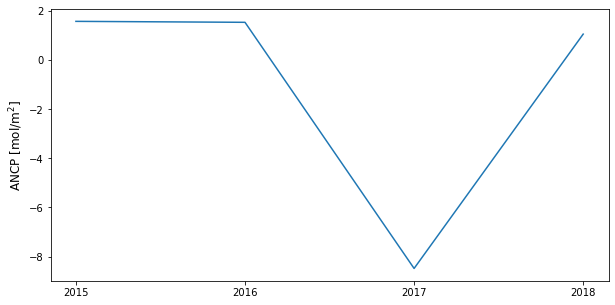

In [23]:
# plot ANCP for chosen float over specified time period
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(years, nitr_ancp)
ax.set_ylabel('ANCP [mol/m$^2$]', size = 12) 
ax.set_xticks(years)
ax.set_xticklabels(['2015', '2016', '2017', '2018'])
ax.set_title('ANCP for Float ' + float_id)

In [24]:
# Find winter maximum and summer minimum upper ocean nitrate levels 
def find_extrema(data, date_range, find_func):
    # Find indices of float profiles in the date range
    date_mask = (JULD > date_range[0]) & (JULD < date_range[1])
    
    # Get the index where the data is closest to the find_func
    index = np.where(data[date_mask] == find_func(data[date_mask]))[0][0]
    
    # Get the average data for the month of the extrema
    month_start = JULD[date_mask][index].replace(day = 1) # .replace just changes the day of max/min to 1
    month_dates = (JULD > month_start) & (JULD < month_start + pd.Timedelta(days = 30)) 
            # ^ not sure why this is needed? or what it does? - it is not used later on...
    month_avg = np.mean(data[date_mask]) #average whole winter or summer values
            # ^ but it should be just the month of max/min nitrate, 
            # not the average for the whole season?... 
    
   # month_mask = (JULD.month[date_mask] == month_start.month)
   # month_avg = np.mean(data[date_mask][month_mask])
    
    return month_avg, JULD[date_mask][index], data[date_mask][index]

years = [2015, 2016, 2017, 2018]
nitr_extrema = []
nitr_ancp = []
for y in years:
    winter_range = [pd.datetime(y, 8, 1), pd.datetime(y, 12, 1)]
    summer_range = [pd.datetime(y, 12, 1), pd.datetime(y + 1, 4, 1)]

    # Find maximum winter and minimum summer nitrate
    avg_max_nitr, max_nitr_date, max_nitr = find_extrema(nitr, winter_range, np.max)
    avg_min_nitr, min_nitr_date, min_nitr = find_extrema(nitr, summer_range, np.min)
    
    
    # Convert to annual nitrate drawdown
    redfield_ratio = 106.0/16.0 #106C:16NO3-
    
    # Nitrate units: umol/kg --> divide by 1000 to convert to mol/kg
    
    nitr_drawdown = (avg_max_nitr - avg_min_nitr)/1000.0 * redfield_ratio
    
    nitr_ancp.append(nitr_drawdown)
    
    nitr_extrema.append(((max_nitr, max_nitr_date), (min_nitr, min_nitr_date)))
    
    print(y, max_nitr_date, max_nitr, avg_max_nitr)
    print(y, min_nitr_date, min_nitr, avg_min_nitr)

2015 2015-10-15 13:41:00.000000768 5569.222089200839 5515.941388764965
2015 2016-01-15 17:37:59.999998208 5238.539176706666 5335.717761504481
2016 2016-10-21 12:14:00.000000256 5522.469699491864 5484.77379939102
2016 2017-02-01 12:36:00.000002048 5228.216929876666 5348.365601665027
2017 2017-10-27 20:15:59.999996416 5574.097591645161 4931.572873100042
2017 2018-02-18 10:49:59.999998976 4418.333321058395 5139.096051436783
2018 2018-11-23 11:54:59.999997696 5579.75953913173 5361.997923182396
2018 2019-01-04 00:59:00.000000256 5323.687613398696 5405.228243318643


C:\Users\CLARAD~1\AppData\Local\Temp/ipykernel_11552/3185100293.py:26: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  winter_range = [pd.datetime(y, 8, 1), pd.datetime(y, 12, 1)]
C:\Users\CLARAD~1\AppData\Local\Temp/ipykernel_11552/3185100293.py:27: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  summer_range = [pd.datetime(y, 12, 1), pd.datetime(y + 1, 4, 1)]


Text(0.5, 1.0, 'ANCP for Float 9094')

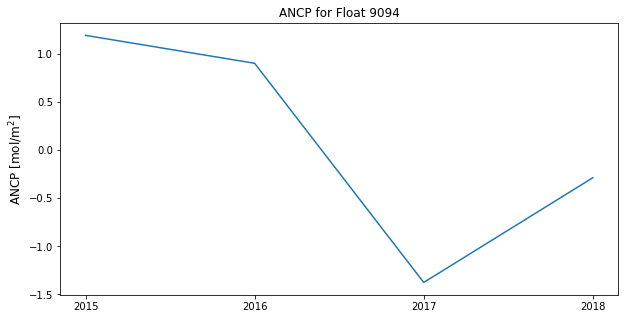

In [12]:
# plot ANCP for chosen float over specified time period
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(years, nitr_ancp)
ax.set_ylabel('ANCP [mol/m$^2$]', size = 12) 
ax.set_xticks(years)
ax.set_xticklabels(['2015', '2016', '2017', '2018'])
ax.set_title('ANCP for Float ' + float_id)

<ipython-input-13-9dc2ba3e9a54>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  winter_range = [pd.datetime(y, 8, 1), pd.datetime(y, 12, 1)]
<ipython-input-13-9dc2ba3e9a54>:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  summer_range = [pd.datetime(y, 12, 1), pd.datetime(y + 1, 4, 1)]
<ipython-input-13-9dc2ba3e9a54>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  winter_range = [pd.datetime(y, 8, 1), pd.datetime(y, 12, 1)]
<ipython-input-13-9dc2ba3e9a54>:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  summer_range = [pd.datetime(y, 12, 1), pd.datetime(y + 1, 4, 1)]
<ipython-input-1

(4.5, 6.178878531256017)

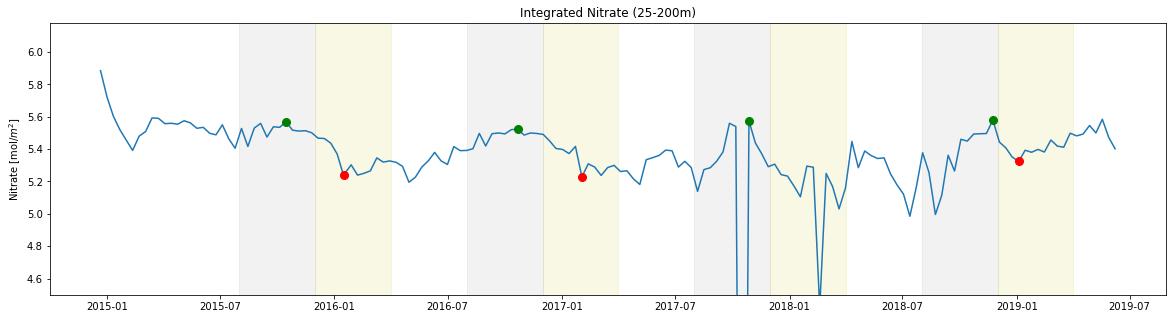

In [13]:
# Plot values of integrated nitrate (mol/m2) 

fig, ax = plt.subplots(figsize = (20, 5))

# Integrate nitrate and poc between given depth range
zi_range = [25, 200]
nitr_v = np.array(integrate(zi, nitr_int, zi_range))/1000.0

# Function to mark the maximum/minimum values of the data for summer and winter
def add_extrema(ax, ydata, extrema):
    for i in range(len(years)):
        y = years[i]
        winter_range = [pd.datetime(y, 8, 1), pd.datetime(y, 12, 1)]
        summer_range = [pd.datetime(y, 12, 1), pd.datetime(y + 1, 4, 1)]
        plt.axvspan(winter_range[0], winter_range[1], color='grey', alpha=0.1)
        plt.axvspan(summer_range[0], summer_range[1], color='y', alpha=0.1)

        (nmax, dmax), (nmin, dmin) = extrema[i]
        nitr_vmax = ydata[JULD == dmax]
        nitr_vmin = ydata[JULD == dmin]
        ax.plot([dmax], nitr_vmax, color = 'g', marker='o', markersize=8)
        ax.plot([dmin], nitr_vmin, color = 'r', marker='o', markersize=8)
    return ax 

#ax = plt.subplot(2, 1, 1)
ax.plot(JULD, nitr_v)
add_extrema(ax, nitr_v, nitr_extrema)
ax.set_ylabel('Nitrate [mol/$m^2$]')
ax.set_title('Integrated Nitrate (' + str(zi_range[0]) + '-' + str(zi_range[1]) + 'm)')
ax.set_ylim([4.5, ax.get_ylim()[1]])

# Integrated Chl~

In [156]:
fdLR.Chl_a_QF[:, ::-1] 
# interpolate nitrate values across zi depth intervals for all 188 profiles 
# ::-1 sets stride to -1 intervals
print(np.array(fdLR.Chl_a_QF[0]))
print(np.array(fdLR.Chl_a[0]))

[b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0'
 b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0'
 b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0'
 b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0' b'0'
 b'0' b'0' b'0' b'0' b'4' b'4' b'1' b'1' b'1' b'1' b'1' b'1']
[0.     0.0036 0.     0.0036 0.0036 0.0036 0.0036 0.     0.     0.0036
 0.0036 0.0036 0.     0.0072 0.     0.0072 0.     0.0072 0.0072 0.0036
 0.0036 0.0036 0.     0.0072 0.     0.0036 0.0072 0.0072 0.0036 0.
 0.0072 0.     0.     0.0036 0.     0.     0.     0.0036 0.0036 0.0036
 0.     0.     0.0072 0.0036 0.0036 0.0144 0.0252 0.0612 0.1044 0.09
 0.1764 0.252  0.2268 0.3924 0.3492 0.3096 0.3924 0.3384 0.2916 0.3204
 0.2628 0.2628    nan    nan    nan    nan    nan    nan]


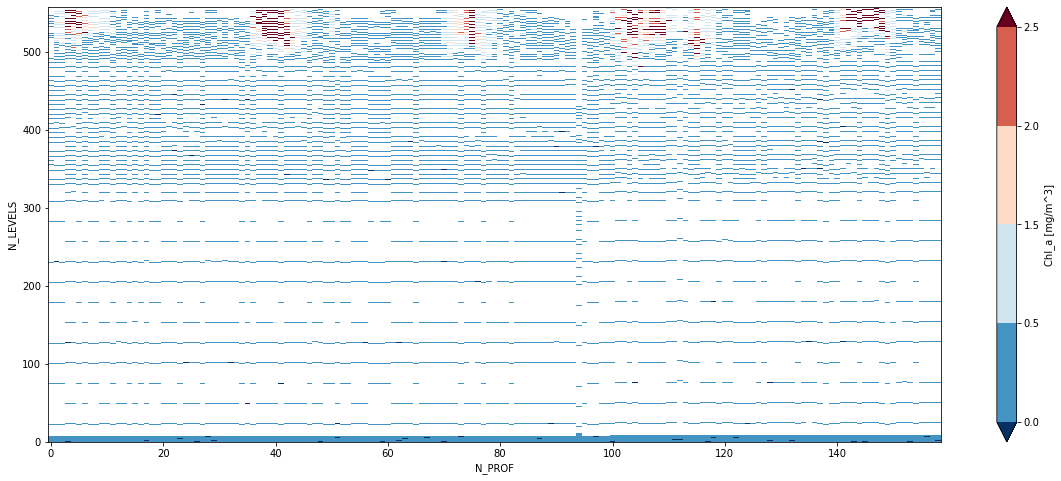

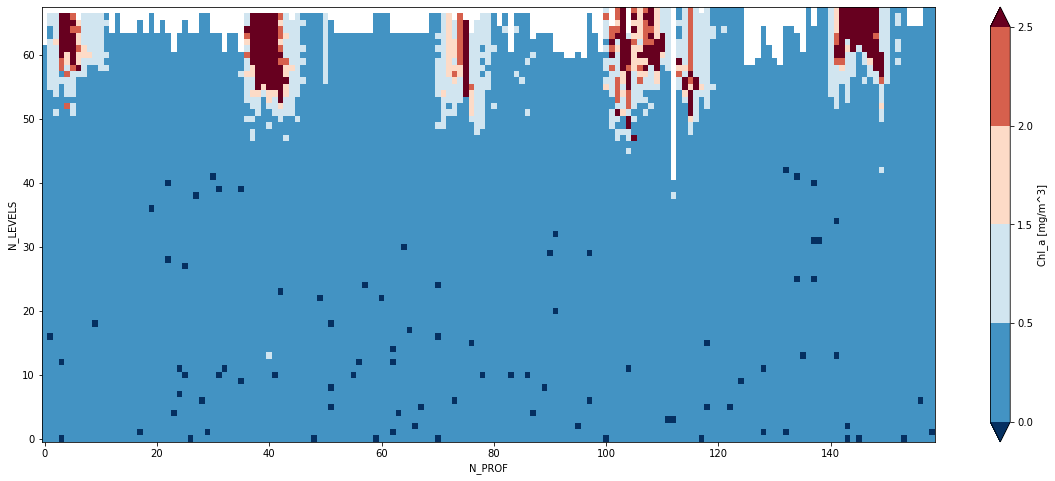

In [225]:
chl2plt=fdLR.Chl_a[:, ::1]
chl2plot=fd.Chl_a[:, ::1]
fig, ax = plt.subplots(figsize = (20, 8))
ax2=chl2plot.T.plot(levels=[0,0.5,1.5,2.0,2.5])
fig2, ax2 = plt.subplots(figsize = (20, 8))
ax=chl2plt.T.plot(levels=[0,0.5,1.5,2.0,2.5])
#print(np.array(fdLR.Chl_a_QF[0]))
#print(np.array(fd.Chl_a_QF[1]))
#print(np.array(fd21.Depth[0]))

In [187]:
# Interpolate nitrate and poc
zi = np.arange(0, 1600, 5) # 5 = 320 depth intervals between 0m to 1595m
chl_int = interpolate(zi, fd21.Pressure[:, ::-1], fd21.Chl_a[:, ::-1]) # interpolate nitrate values across zi depth intervals for all 188 profiles

# Integrate nitrate and poc - total nitrate in upper 200m
upperlim=25
lowerlim=200
chl_ing = np.array(integrate(zi, chl_int, [upperlim, lowerlim])) # integrate interpolated nitrate values between 25m-200m 

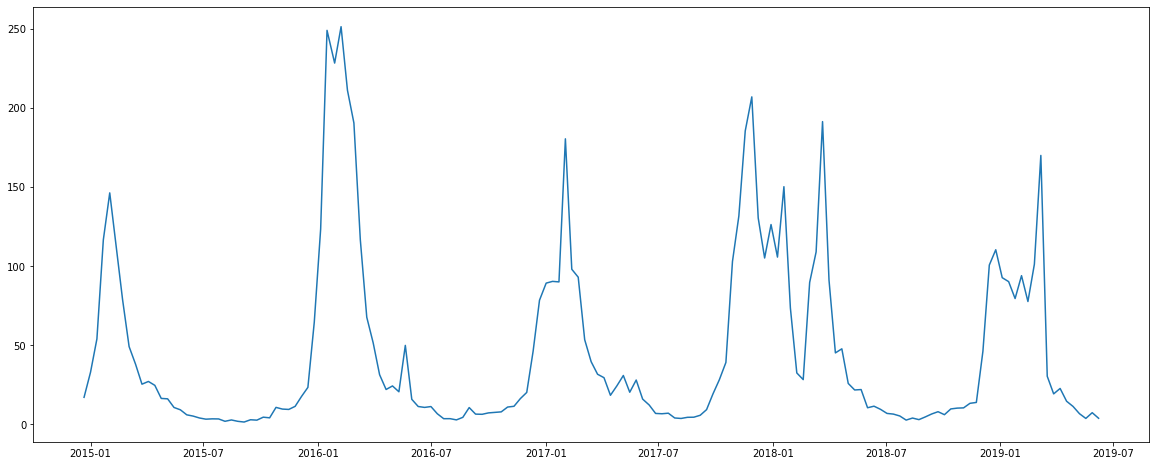

In [188]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.plot(JULD, chl_ing)

#### corrected chl

In [184]:
# Interpolate nitrate and poc
zi = np.arange(0, 1600, 5) # 5 = 320 depth intervals between 0m to 1595m
chlcor_int = interpolate(zi, fd.Pressure[:, ::-1], fd.Chl_a_corr[:, ::-1]) # interpolate nitrate values across zi depth intervals for all 188 profiles

# Integrate nitrate and poc - total nitrate in upper 200m
upperlim=25
lowerlim=200
chlcor_ing = np.array(integrate(zi, chlcor_int, [upperlim, lowerlim])) # integrate interpolated nitrate values between 25m-200m 

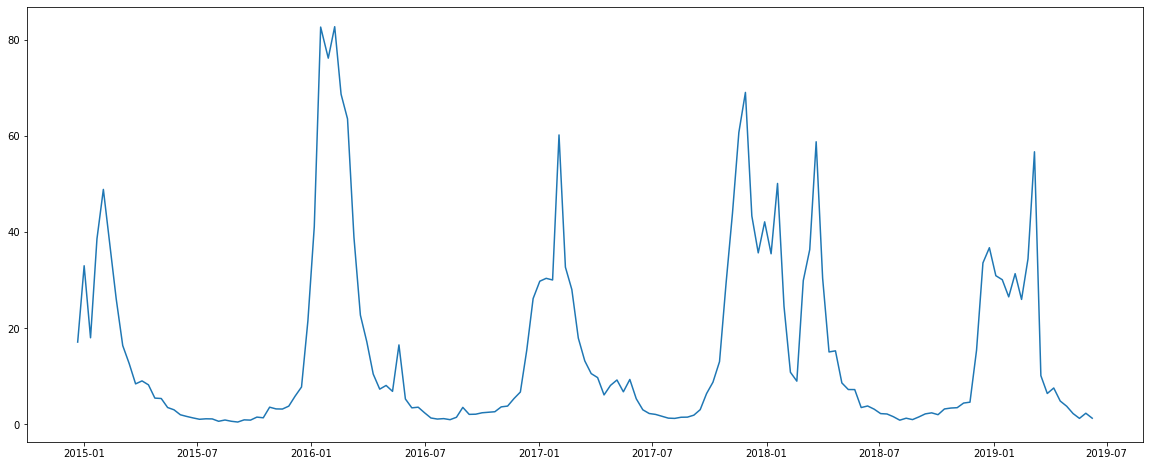

In [185]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.plot(JULD, chlcor_ing)

#### plot together

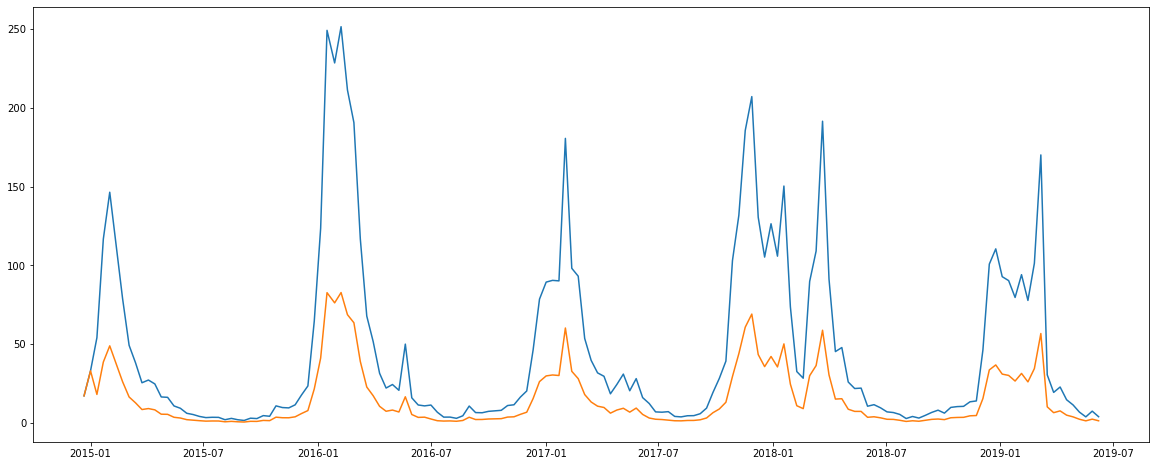

In [186]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.plot(JULD, chl_ing)
ax.plot(JULD, chlcor_ing)

In [229]:
np.array(fd['Nitrate'][10])

array([33.66, 33.66, 33.67, 33.8 , 33.77, 33.72, 33.82, 33.72,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan, 33.59,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan, 33.61,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan, 33.58,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan, 33.61,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan, 33.42,

In [202]:
fd['Nitrate_QF'][0,::-1].values.astype(float)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1.

In [212]:
fd21['Nitrate'][0,::-1].values.astype(float)

array([  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan, 32.51,   nan,   nan,   nan, 32.48,   nan,   nan,   nan,
       32.67,   nan,   nan, 32.66,   nan,   nan,   nan, 32.78,   nan,
         nan,   nan, 32.9 ,   nan,   nan,   nan, 33.45,   nan,   nan,
       33.29,   nan,   nan, 33.4 ,   nan,   nan,   nan, 33.1 ,   nan,
         nan,   nan, 33.18,   nan,   nan,   nan,   nan, 34.5 ,   nan,
         nan,   nan, 35.5 ,   nan,   nan,   nan,   nan, 35.39,   nan,
         nan,   nan,   nan, 35.44,   nan,   nan,   nan,   nan, 35.36,
         nan,   nan,   nan,   nan,   nan, 35.4 ,   nan,   nan,   nan,
         nan,   nan, 35.31,   nan,   nan,   nan,   nan,   nan, 35.14,
         nan,   nan,   nan,   nan, 35.  ,   nan,   nan,   nan,   nan,
         nan, 34.96,   nan,   nan,   nan,   nan,   nan,   nan, 34.88,
         nan,   nan,   nan,   nan,   nan, 34.91,   nan,   nan,   nan,
         nan,   nan, 34.93,   nan,   nan,   nan,   nan,   nan, 34.85,
         nan,   nan,

In [213]:
fd21['Depth'][0,::-1].values.astype(float)

array([     nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,    8.475,      nan,
            nan,      nan,   14.535,      nan,      nan,      nan,
         19.99 ,      nan,      nan,   25.376,      nan,      nan,
            nan,   30.593,      nan,      nan,      nan,   35.711,
            nan,      nan,      nan,   41.661,      nan,      nan,
         46.779,      nan,      nan,   51.303,      nan,      nan,
            nan,   56.519,      nan,      nan,      nan,   62.726,
            nan,      nan,      nan,      nan,   69.536,      nan,
            nan,      nan,   76.741,      nan,      nan,      nan,
            nan,   84.392,      nan,      nan,      nan,      nan,
         92.438,      nan,      nan,      nan,      nan,  100.277,
            nan,      nan,      nan,      nan,      nan,  110.42 ,
            nan,      nan,      nan,      nan,      nan,  119.406,
            nan,      nan,      nan,      nan,      nan,  129.

In [216]:
np.array(fd21['Depth'][0,::-1])


array([     nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,    8.475,      nan,
            nan,      nan,   14.535,      nan,      nan,      nan,
         19.99 ,      nan,      nan,   25.376,      nan,      nan,
            nan,   30.593,      nan,      nan,      nan,   35.711,
            nan,      nan,      nan,   41.661,      nan,      nan,
         46.779,      nan,      nan,   51.303,      nan,      nan,
            nan,   56.519,      nan,      nan,      nan,   62.726,
            nan,      nan,      nan,      nan,   69.536,      nan,
            nan,      nan,   76.741,      nan,      nan,      nan,
            nan,   84.392,      nan,      nan,      nan,      nan,
         92.438,      nan,      nan,      nan,      nan,  100.277,
            nan,      nan,      nan,      nan,      nan,  110.42 ,
            nan,      nan,      nan,      nan,      nan,  119.406,
            nan,      nan,      nan,      nan,      nan,  129.